In [1]:
#Importing Libraries
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Importing Dataset


In [4]:
import os
import random

def collect_image_paths(directory):
    paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
    return paths

# Collect image paths
path1 = collect_image_paths('D:/CSV/Data/Non Demented')
path2 = collect_image_paths('D:/CSV/Data/Mild Dementia')
path3 = collect_image_paths('D:/CSV/Data/Moderate Dementia')
path4 = collect_image_paths('D:/CSV/Data/Very mild Dementia')

# Set the size of the sample
size = 400  # You can change this value as needed

# Set seed for reproducibility
random.seed(42)

# Sample random paths
sample_path1 = random.sample(path1, min(size, len(path1)))
sample_path2 = random.sample(path2, min(size, len(path2)))
sample_path3 = random.sample(path3, min(size, len(path3)))
sample_path4 = random.sample(path4, min(size, len(path4)))

# Output the sample sizes
print(f'Sampled {len(sample_path1)} paths from Non Demented')
print(f'Sampled {len(sample_path2)} paths from Mild Dementia')
print(f'Sampled {len(sample_path3)} paths from Moderate Dementia')
print(f'Sampled {len(sample_path4)} paths from Very mild Dementia')

Sampled 400 paths from Non Demented
Sampled 400 paths from Mild Dementia
Sampled 400 paths from Moderate Dementia
Sampled 400 paths from Very mild Dementia


# One-Hot encoding

In [7]:
# Initialize the encoder
encoder = OneHotEncoder()

# Fit the encoder on your categorical data
encoder.fit([[0], [1], [2], [3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [9]:
data = []
result = []
for path in sample_path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in sample_path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in sample_path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in sample_path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [11]:
data = np.array(data)
data.shape

(1600, 128, 128, 3)

In [13]:
result = np.array(result)
result = result.reshape((1600,4))
result.shape

(1600, 4)

# Splitting the Data


In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

# Creating CNN Model


In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [21]:
y_train.shape

(1360, 4)

In [23]:
x_train.shape

(1360, 128, 128, 3)

In [25]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 53s 373ms/step - accuracy: 0.4079 - loss: 17.0879 - val_accuracy: 0.4875 - val_loss: 1.1433
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 48s 355ms/step - accuracy: 0.6259 - loss: 1.1235 - val_accuracy: 0.7000 - val_loss: 0.7826
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 48s 356ms/step - accuracy: 0.7080 - loss: 0.7075 - val_accuracy: 0.7000 - val_loss: 0.6455
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 46s 340ms/step - accuracy: 0.7683 - loss: 0.5899 - val_accuracy: 0.8042 - val_loss: 0.5031
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 47s 343ms/step - accuracy: 0.7918 - loss: 0.4892 - val_accuracy: 0.8375 - val_loss: 0.5044
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 47s 344ms/step - accuracy: 0.8527 - loss: 0.3989 - val_accuracy: 0.8417 - val_loss: 0.4500
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 48s 351ms/step - accuracy: 0.8459 - loss: 0.3656 - val_accuracy: 0.8917 - val_loss: 0.4042
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 48s 352ms/step - accuracy: 0.8925 - loss: 

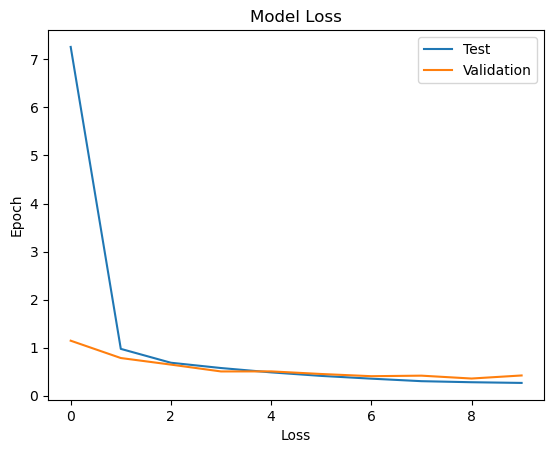

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

# Accuracy and Prediction

In [30]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'

95.06988525390625% Confidence This Is Mild Dementia


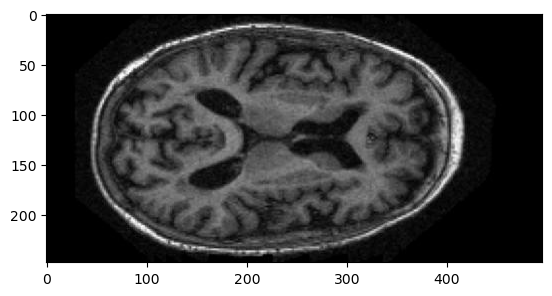

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r'D:/CSV/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_141.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Very Mild Dementia


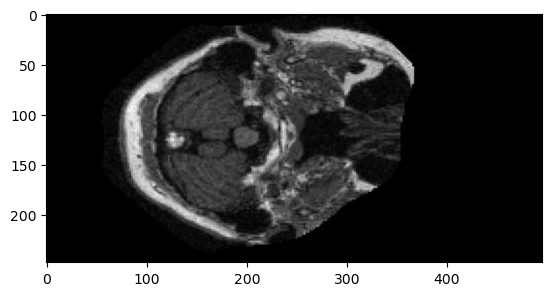

In [34]:
img = Image.open(r'D:/CSV/Data/Very Mild Dementia/OAS1_0003_MR1_mpr-1_102.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))


99.87077713012695% Confidence This Is Moderate Dementia


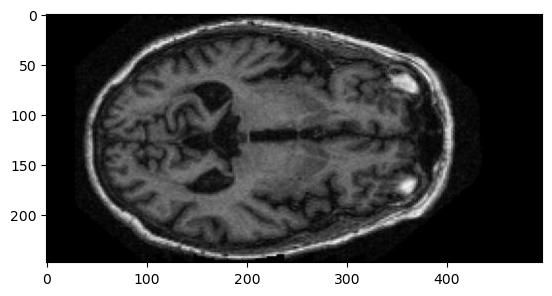

In [36]:
img = Image.open(r'D:/CSV/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_142.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load VGG16 as a feature extractor
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Define the directory path to the dataset
data_dir = "D:/CSV/Data"  # Update if necessary

# Prepare ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Load training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

# Load validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Extract features using VGG16
X_train_features = vgg16.predict(train_data)
X_test_features = vgg16.predict(val_data)

# Get labels
y_train = train_data.classes
y_test = val_data.classes

Found 69151 images belonging to 4 classes.
Found 17286 images belonging to 4 classes.


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2161/2161 ━━━━━━━━━━━━━━━━━━━━ 1250s 578ms/step
541/541 ━━━━━━━━━━━━━━━━━━━━ 320s 590ms/step


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_features.reshape(len(X_train_features), -1), y_train)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_features.reshape(len(X_test_features), -1))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.03      0.05      1000
           1       1.00      0.08      0.15        97
           2       0.78      0.99      0.87     13444
           3       0.22      0.02      0.03      2745

    accuracy                           0.77     17286
   macro avg       0.64      0.28      0.28     17286
weighted avg       0.68      0.77      0.69     17286



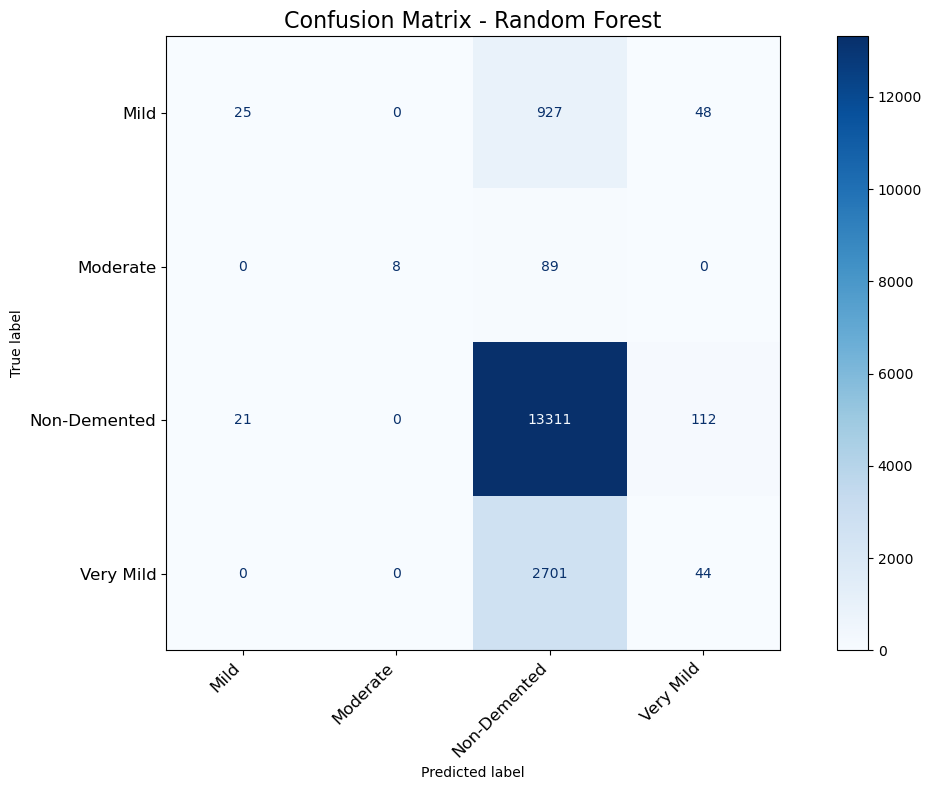

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming `cm_rf` is your confusion matrix and `class_labels` contains your labels
class_labels = ['Mild', 'Moderate', 'Non-Demented', 'Very Mild']
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
